# Chapter 2

## [Life Expectancy (WHO)](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

## Opening a dataset with pandas 

In [2]:
df = pd.read_csv (r'C:\\Users\\Rock4\\Downloads\\Life Expectancy Data.csv')

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Check for missing values and NaN.

In [4]:
df.isnull().values.any()

True

In [5]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

## Data Cleaning

In [6]:
# TASK8 
# dropping all columns with any NaN values from the dataset
#cleaned_data = df.dropna(axis=1, how='any') 

# displaying the first few rows of the cleaned dataset to verify
#cleaned_data.head()

In [7]:
df = df.fillna(method='bfill') 

In [8]:
df.isnull().values.any() 

False

## Matrix representation 

In [9]:
selected_features = df[['Life expectancy ', 'Adult Mortality', 'Alcohol', 'percentage expenditure']].head(10)
selected_features

,Life expectancy,Adult Mortality,Alcohol,percentage expenditure
0,65.0,263.0,0.01,71.279624
1,59.9,271.0,0.01,73.523582
2,59.9,268.0,0.01,73.219243
3,59.5,272.0,0.01,78.184215
4,59.2,275.0,0.01,7.097109
5,58.8,279.0,0.01,79.679367
6,58.6,281.0,0.01,56.762217
7,58.1,287.0,0.03,25.873925
8,57.5,295.0,0.02,10.910156
9,57.3,295.0,0.03,17.171518


In [10]:
# find the maximum and minimum values for each feature
max_values = selected_features.max()
min_values = selected_features.min()

# create a matrix of maximum and minimum values for each feature
matrix = pd.concat([max_values, min_values], axis=1)
matrix.columns = ['max', 'min']

# function for highlighting with color
def highlight_max_min(val):
    color = ['background-color: green' if val == max_value else
         'background-color: red' if val == min_value else
         '' for val, max_value, min_value in zip(val, max_values, min_values)]
    return color

# display the matrix with the maximum and minimum values highlighted in color
styled_matrix = matrix.style.apply(highlight_max_min, axis=0)
styled_matrix


,max,min
Life expectancy,65.000000,57.300000
Adult Mortality,295.000000,263.000000
Alcohol,0.030000,0.010000
percentage expenditure,79.679367,7.097109


## Math expectation 

In [11]:
numeric_columns = df.select_dtypes(include=[float, int])
mean_values = numeric_columns.mean()
mean_values

Year                               2.007519e+03
Life expectancy                    6.923410e+01
Adult Mortality                    1.646726e+02
infant deaths                      3.030395e+01
Alcohol                            4.493087e+00
percentage expenditure             7.382513e+02
Hepatitis B                        8.137304e+01
Measles                            2.419592e+03
 BMI                               3.857723e+01
under-five deaths                  4.203574e+01
Polio                              8.264159e+01
Total expenditure                  5.976076e+00
Diphtheria                         8.241695e+01
 HIV/AIDS                          1.742103e+00
GDP                                7.393906e+03
Population                         1.139037e+07
 thinness  1-19 years              4.808645e+00
 thinness 5-9 years                4.838325e+00
Income composition of resources    6.373210e-01
Schooling                          1.221467e+01
dtype: float64

## Dispersion

In [12]:
dispersion = df.var(numeric_only=True)
dispersion

Year                               2.128753e+01
Life expectancy                    9.056044e+01
Adult Mortality                    1.542285e+04
infant deaths                      1.390666e+04
Alcohol                            1.659412e+01
percentage expenditure             3.951805e+06
Hepatitis B                        6.032302e+02
Measles                            1.314983e+08
 BMI                               4.040515e+02
under-five deaths                  2.574277e+04
Polio                              5.466693e+02
Total expenditure                  6.331895e+00
Diphtheria                         5.602411e+02
 HIV/AIDS                          2.578390e+01
GDP                                1.783400e+08
Population                         2.923765e+15
 thinness  1-19 years              1.942120e+01
 thinness 5-9 years                2.021024e+01
Income composition of resources    4.412145e-02
Schooling                          1.177008e+01
dtype: float64

## Standard data

In [13]:
numeric_columns = df.select_dtypes(include=[float, int])
mean_values = numeric_columns.mean()
std_deviation = numeric_columns.std()
standardized_data = (numeric_columns - mean_values) / std_deviation
df[numeric_columns.columns] = standardized_data

In [14]:
df[numeric_columns.columns] 

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.621486,-0.444931,0.791758,0.268778,-1.100525,-0.335513,-0.666635,-0.110366,-0.968967,0.255316,-3.277949,0.867902,-0.735842,-0.323390,-0.509918,0.413267,2.811776,2.771984,-0.753726,-0.616386
1,1.404747,-0.980852,0.856176,0.285738,-1.100525,-0.334384,-0.788781,-0.168095,-0.993841,0.274014,-1.053917,0.875850,-0.862588,-0.323390,-0.507788,-0.204594,2.879851,2.816472,-0.768008,-0.645534
2,1.188008,-0.980852,0.832019,0.302697,-1.100525,-0.334537,-0.707350,-0.173502,-1.018715,0.292712,-0.882838,0.855980,-0.778091,-0.323390,-0.506362,0.376191,2.925234,2.860960,-0.796573,-0.674682
3,0.971269,-1.022885,0.864228,0.328137,-1.100525,-0.332040,-0.585204,0.032040,-1.043590,0.317642,-0.668989,1.010968,-0.651345,-0.323390,-0.503500,-0.142281,2.970616,2.927692,-0.829898,-0.703830
4,0.754530,-1.054410,0.888385,0.345097,-1.100525,-0.367800,-0.544488,0.051748,-1.063489,0.342573,-0.626219,0.752655,-0.609096,-0.323390,-0.548910,-0.155567,3.038691,2.972181,-0.872745,-0.791275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,-0.762644,-2.620140,4.495797,-0.028017,-0.032671,-0.371370,-0.544488,-0.208296,-0.570977,-0.000223,-0.668989,0.458575,-0.735842,6.273976,-0.519644,0.025654,1.041844,1.014702,-1.096500,-0.878719
2934,-0.979384,-2.599124,4.431378,-0.036497,-0.106316,-0.371370,-3.028126,-0.123970,-0.590877,-0.006455,-3.235179,0.216158,-0.609096,6.884478,-0.519720,0.022998,1.132610,1.125923,-1.044132,-0.791275
2935,-1.196123,-2.567599,-0.738171,-0.044977,-0.015487,-0.371370,-0.340912,-0.184490,-0.610776,-0.012688,-0.412369,0.220132,-0.482350,7.494981,-0.549374,-0.208331,-0.818853,-0.787068,-1.001285,-0.645534
2936,-1.412862,-2.515058,4.197863,-0.044977,-0.680748,-0.371370,-0.218765,-0.164869,-0.630676,-0.018921,-0.284060,0.073092,-0.313356,7.947934,-0.512589,0.018046,-0.728088,-0.698091,-1.001285,-0.703830


## Data Visualization 

### Line Plot 

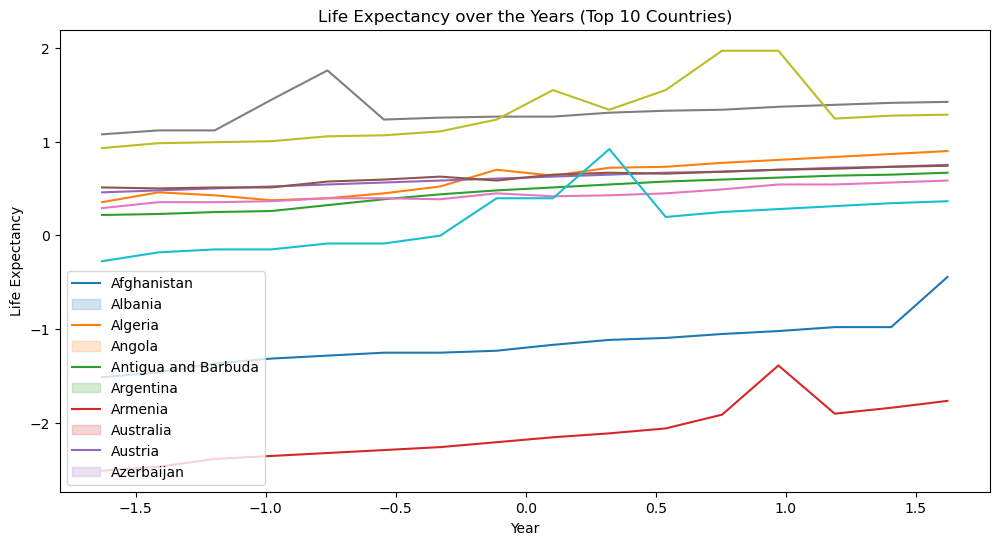

In [15]:
selected_countries = df['Country'].unique()[:10]

plt.figure(figsize=(12, 6))
for country in selected_countries:
    sns.lineplot(data=df[df['Country'] == country], x='Year', y='Life expectancy ')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(selected_countries)
plt.title('Life Expectancy over the Years (Top 10 Countries)')
plt.show()

### Bar Plot

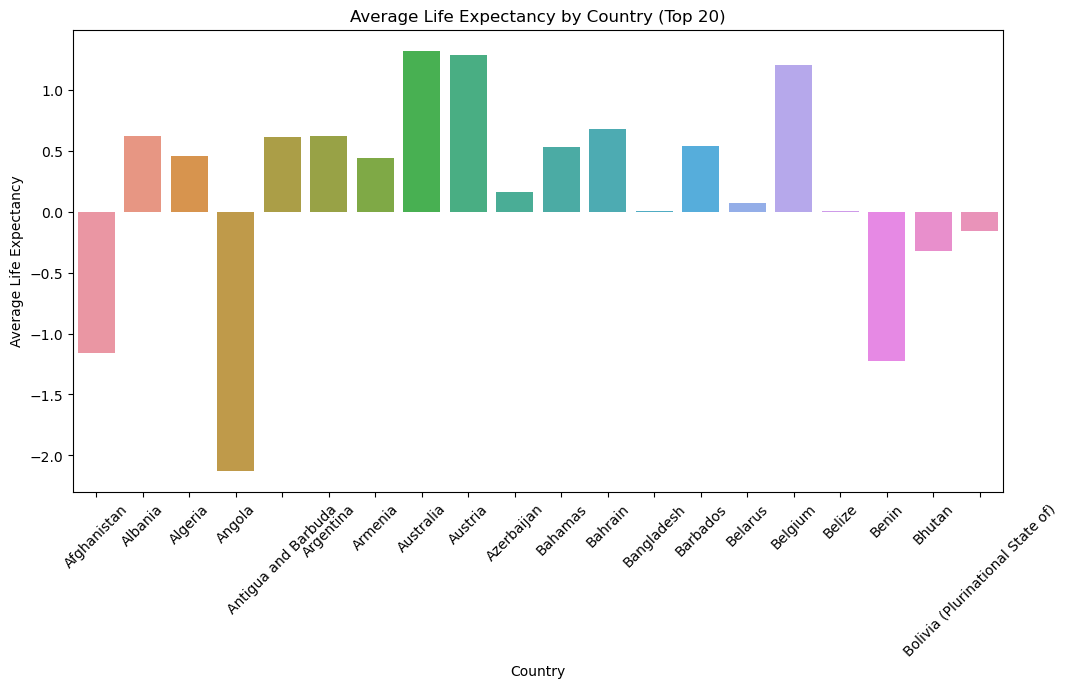

In [17]:
plt.figure(figsize=(12, 6))
avg_life_expectancy = df.groupby('Country')['Life expectancy '].mean().head(20)  # Вибрати перші 10 країн
sns.barplot(x=avg_life_expectancy.index, y=avg_life_expectancy)
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Country (Top 20)')
plt.xticks(rotation=45)
plt.show()

### Histogram 

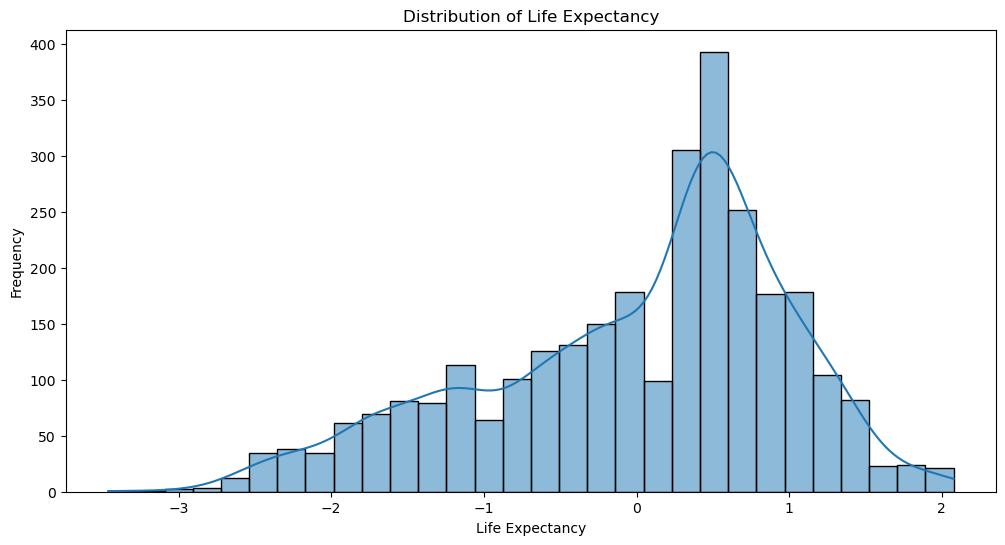

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Life expectancy '], bins=30, kde=True)
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy')
plt.show()

### Heatmap

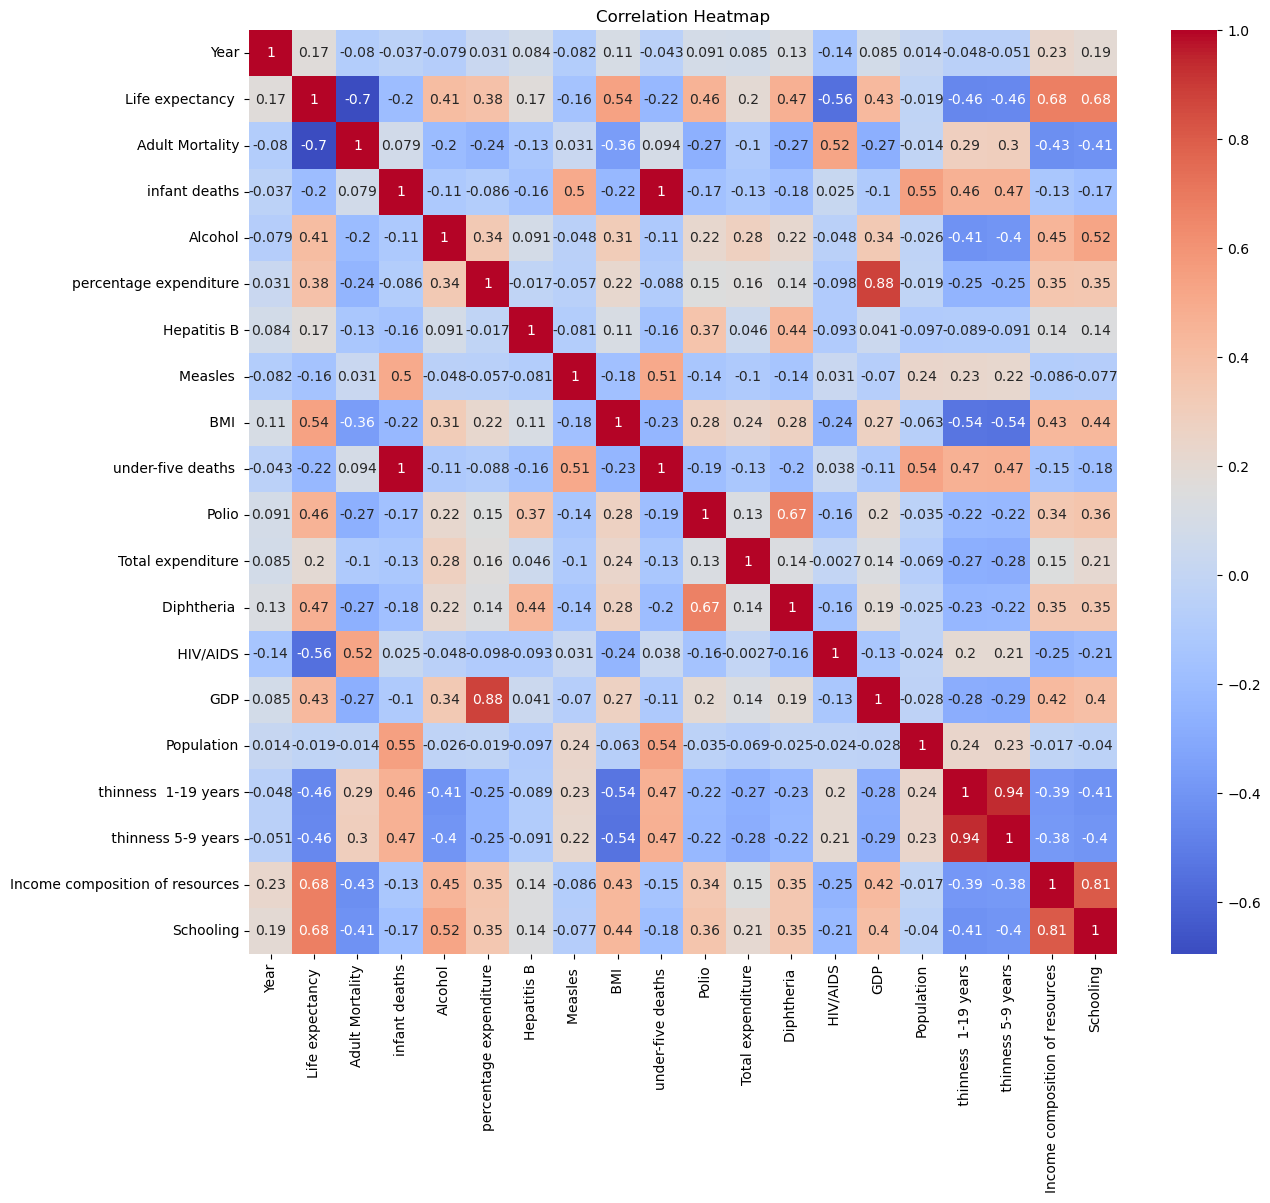

In [19]:
plt.figure(figsize=(14, 12))
numeric_columns = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Task 6

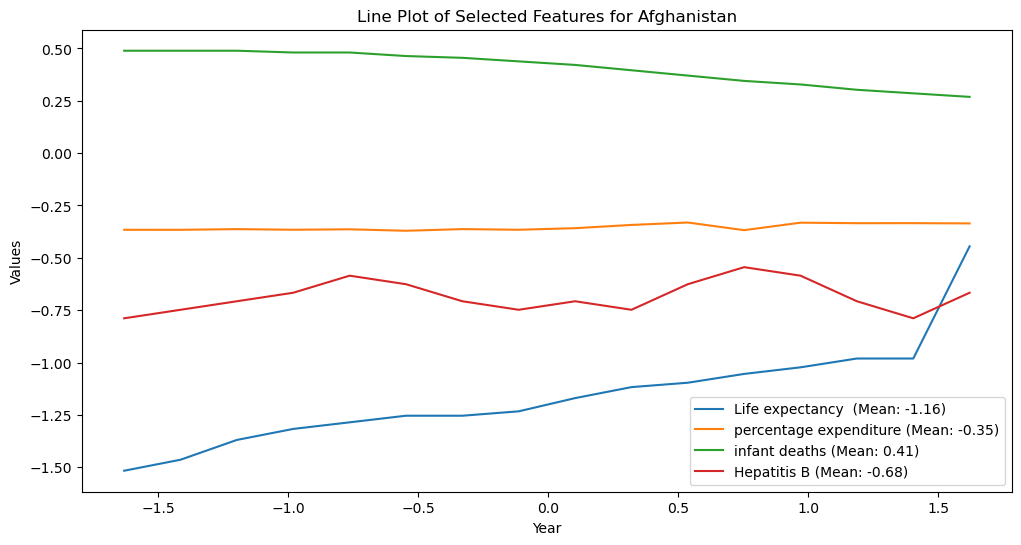

In [20]:
# Filter the data for Afghanistan
features = ['Life expectancy ', 'percentage expenditure', 'infant deaths', 'Hepatitis B']
country_selected = "Afghanistan"
df_filtered_country = df[df['Country'] == country_selected]

# Creating a linear plot for the selected country across all years
plt.figure(figsize=(12, 6))
for feature in ['Life expectancy ', 'percentage expenditure', 'infant deaths', 'Hepatitis B']:
    mean_value = df_filtered_country[feature].mean()
    plt.plot(df_filtered_country['Year'], df_filtered_country[feature], label=f'{feature} (Mean: {mean_value:.2f})')

plt.xlabel('Year')
plt.ylabel('Values')
plt.title(f'Line Plot of Selected Features for {country_selected}')
plt.legend()
plt.show()

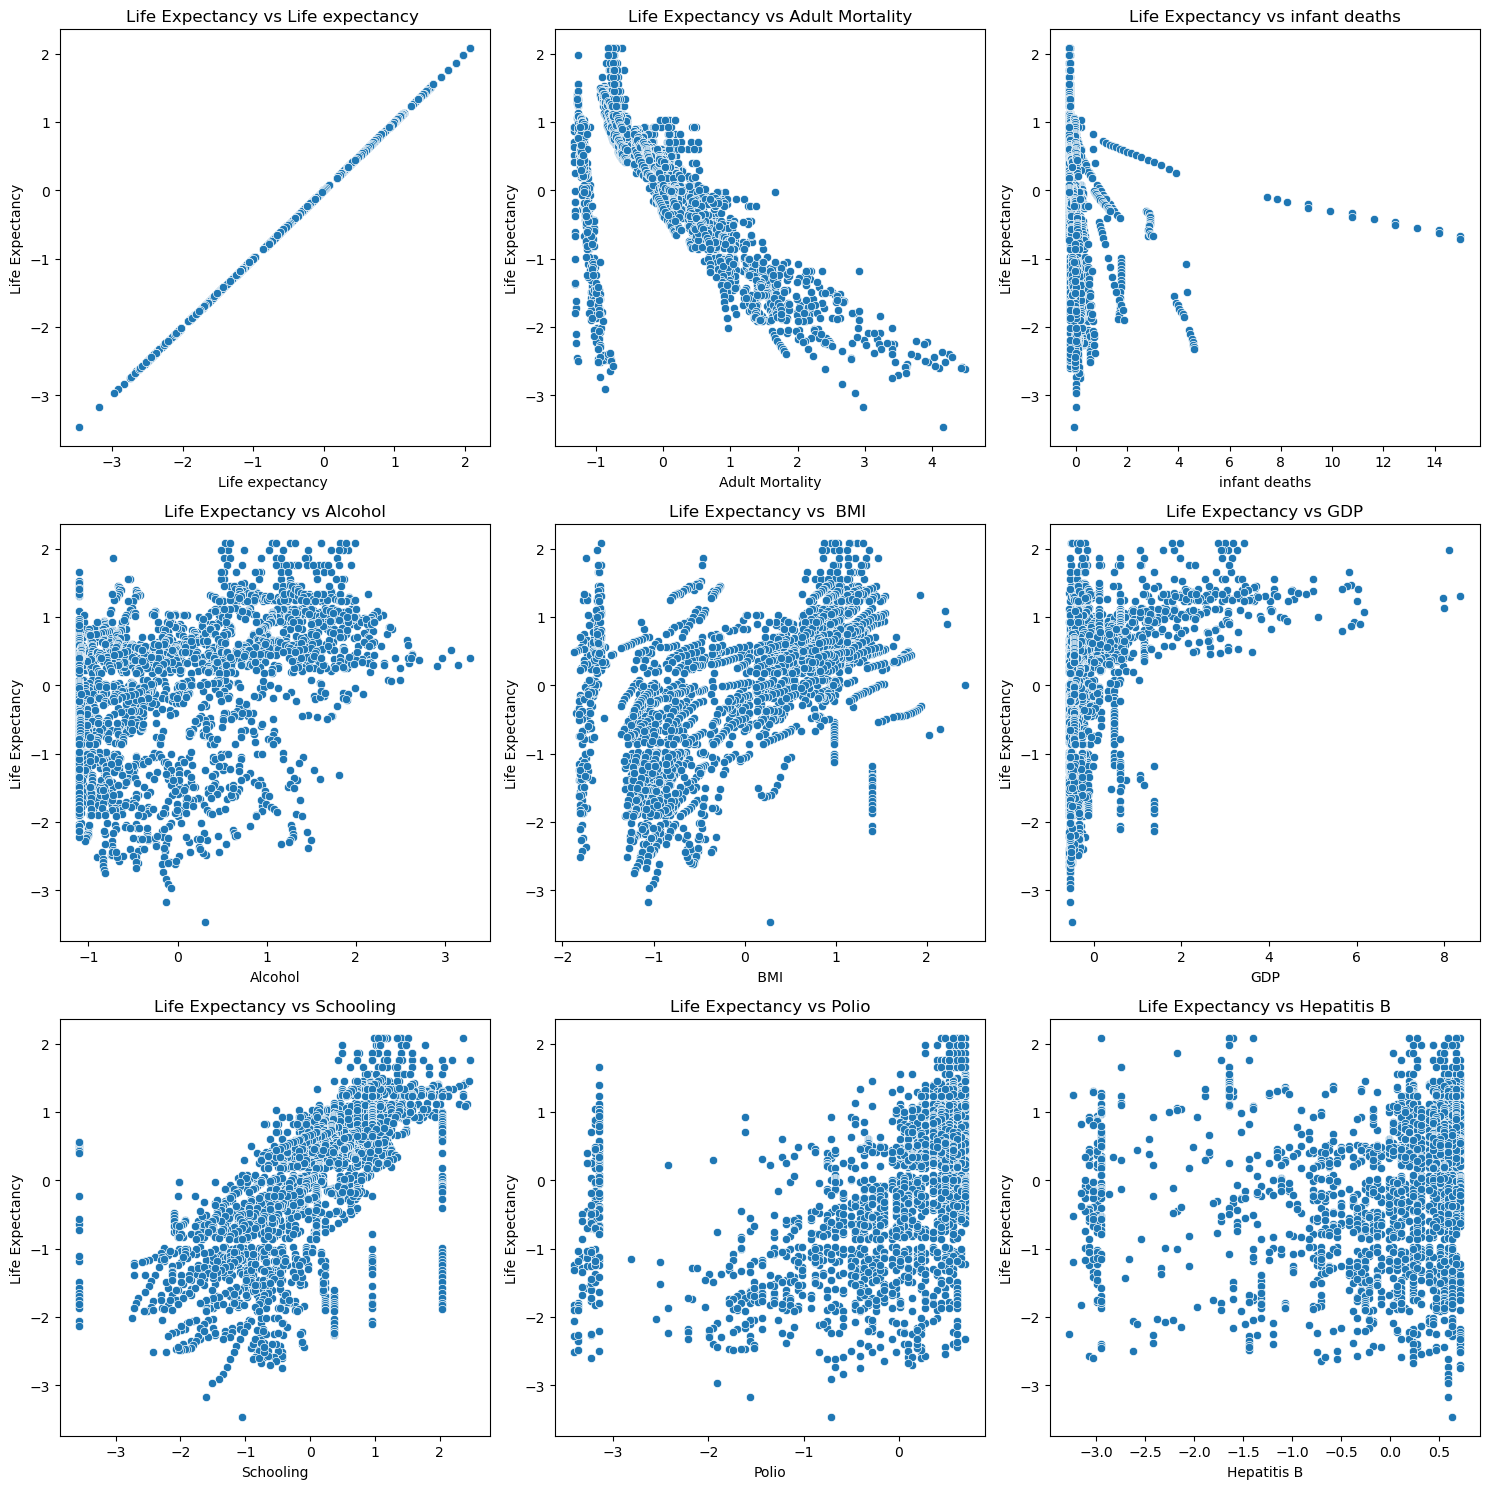

In [21]:
# adjusting the feature names based on the actual column names
subplot_features = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', ' BMI ', 'GDP', 'Schooling', 'Polio', 'Hepatitis B']

# recreating the 9 subplots with the corrected feature names
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, ax in enumerate(axes.flatten()):
    sns.scatterplot(ax=ax, data=df, x=subplot_features[i], y='Life expectancy ')
    ax.set_title(f'Life Expectancy vs {subplot_features[i]}')
    ax.set_xlabel(subplot_features[i])
    ax.set_ylabel('Life Expectancy')

plt.tight_layout()
plt.show()

### Task 7

In [22]:
selected_features = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', ' BMI ', 'GDP', 'Schooling', 'Polio', 'Hepatitis B']
# calculating Pearson correlation coefficients
pearson_correlations = {}
for feature in selected_features:
    if feature != 'Life expectancy ':
        corr = df['Life expectancy '].corr(df[feature], method='pearson')
        pearson_correlations[f'Life expectancy vs {feature}'] = corr

# the pearson_correlations dictionary now contains the Pearson correlation coefficient for each pair
pearson_correlations

{'Life expectancy vs Adult Mortality': -0.6958257409710517,
 'Life expectancy vs infant deaths': -0.19660343379284642,
 'Life expectancy vs Alcohol': 0.4068095090955223,
 'Life expectancy vs  BMI ': 0.538652211389222,
 'Life expectancy vs GDP': 0.42543128375376227,
 'Life expectancy vs Schooling': 0.67755663261605,
 'Life expectancy vs Polio': 0.45886712069867314,
 'Life expectancy vs Hepatitis B': 0.16901720774365264}

C:\Users\RocK4\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


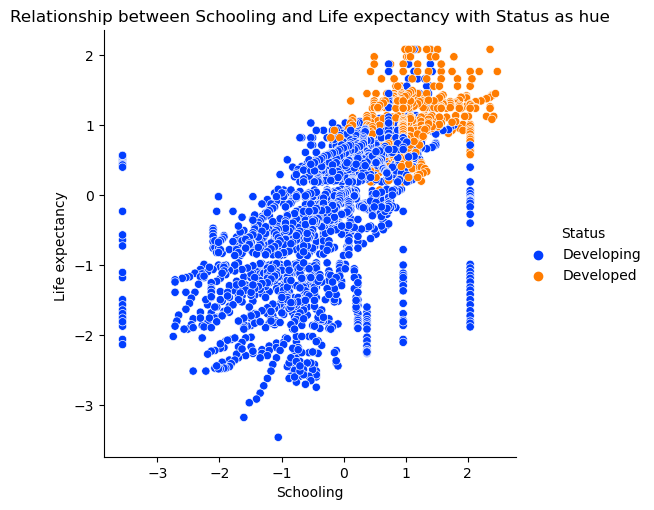

In [23]:
# сorrecting the relplot to use 'Life expectancy ' on the y-axis and 'Schooling' on the x-axis.
# we will also choose a categorical variable for hue. In the absence of a clear categorical feature
# from the dataset's description, we can use 'Status' which indicates whether a country is 'Developing' or 'Developed'.
# this will provide a clear categorical distinction in the data.

sns.relplot(data=df, x='Schooling', y='Life expectancy ', hue='Status', kind='scatter', palette='bright')
plt.title('Relationship between Schooling and Life expectancy with Status as hue')
plt.show()


### Task 9

C:\Users\RocK4\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


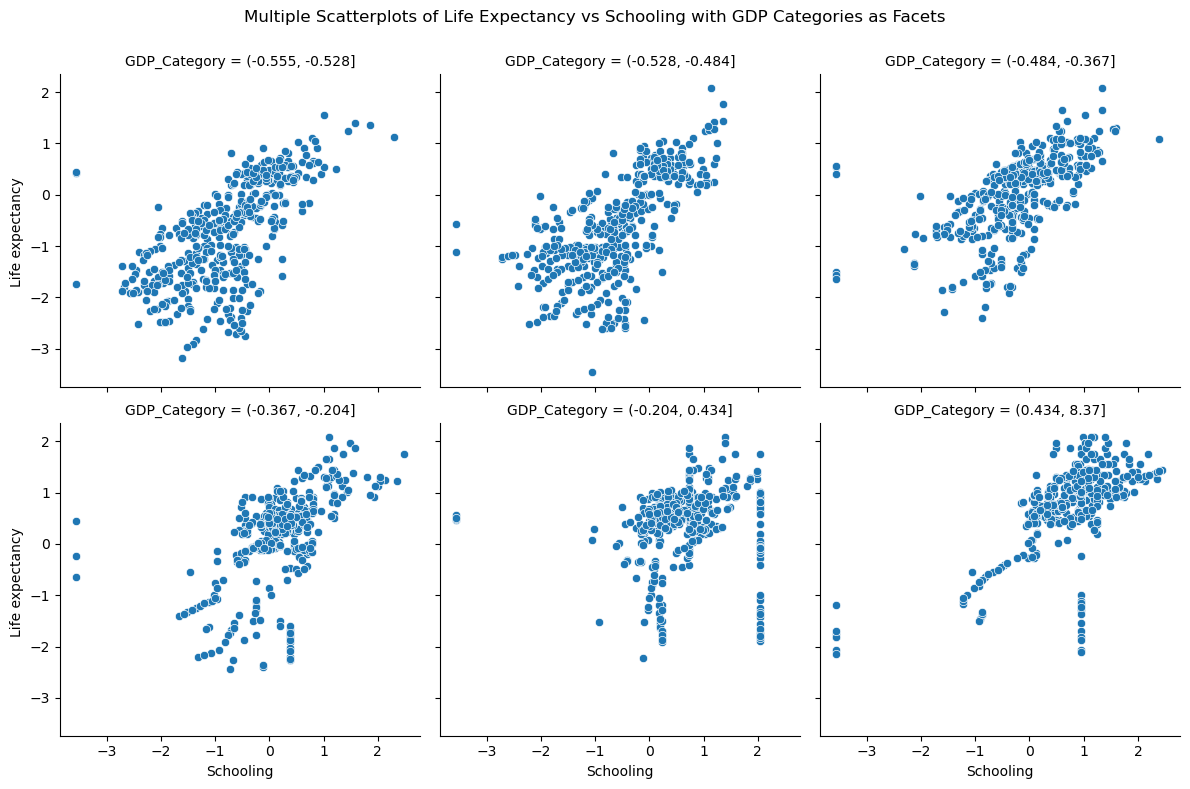

0.6796421533826298

In [25]:
# dropping NaN values from 'Life expectancy ' and 'Schooling'
life_expectancy_data = df.dropna(subset=['Life expectancy ', 'Schooling'])

# calculate the number of rows to remove (10% of the data)
rows_to_remove = int(len(life_expectancy_data) * 0.10)

# removing 10% of random rows from the dataset for both 'Life expectancy ' and 'Schooling'
cleaned_data = life_expectancy_data.sample(frac=1, random_state=1).iloc[rows_to_remove:]

# calculate the new Pearson correlation for the cleaned data
new_corr = cleaned_data[['Life expectancy ', 'Schooling']].corr(method='pearson').iloc[0, 1]

# ensuring 'GDP' column does not have NaN values for the FacetGrid
cleaned_data = cleaned_data.dropna(subset=['GDP'])

# since 'GDP' is a continuous variable, we'll create a categorical version of it by binning into quantiles for clearer FacetGrid panels
cleaned_data['GDP_Category'] = pd.qcut(cleaned_data['GDP'], q=6)

# creating the FacetGrid
g = sns.FacetGrid(cleaned_data, col='GDP_Category', col_wrap=3, height=4)
g.map_dataframe(sns.scatterplot, x='Schooling', y='Life expectancy ')

# adding a main title and adjusting the plots
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Multiple Scatterplots of Life Expectancy vs Schooling with GDP Categories as Facets')


plt.show()
new_corr

# Chapter 3 

### Task 1

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor 

In [25]:
# ensure that only numeric columns are included for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# calculate the Pearson correlation coefficient matrix on the numeric dataframe
correlation_matrix = numeric_df.corr(method='pearson')

# find the two features with the highest absolute correlation (ignoring the diagonal)
highest_corr = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates()
highest_corr_pair = highest_corr.index[1]  # index[0] is the diagonal, which is always 1
correlation_matrix, highest_corr_pair

(                                     Year  Life expectancy   Adult Mortality  \
 Year                             1.000000          0.170613        -0.079977   
 Life expectancy                  0.170613          1.000000        -0.695826   
 Adult Mortality                 -0.079977         -0.695826         1.000000   
 infant deaths                   -0.037415         -0.196603         0.078935   
 Alcohol                         -0.079279          0.406810        -0.203059   
 percentage expenditure           0.031400          0.381033        -0.242408   
 Hepatitis B                      0.084023          0.169017        -0.126931   
 Measles                         -0.082493         -0.157633         0.031357   
  BMI                             0.106936          0.538652        -0.363831   
 under-five deaths               -0.042937         -0.222553         0.094314   
 Polio                            0.090635          0.458867        -0.270081   
 Total expenditure          

In [26]:
# prepare the data
X = df[['Life expectancy ']].values
y = df['Schooling'].values

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# implementing the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# calculate metrics for Linear Regression
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

# return the metrics for Linear Regression
linear_metrics = {
    'Linear Regression': {'MSE': linear_mse, 'R2': linear_r2}
}
linear_metrics

{'Linear Regression': {'MSE': 0.5019089425149128, 'R2': 0.504896621914349}}

In [28]:
# implementing the Random Forest Regression model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# calculate metrics for Random Forest Regression
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# return the metrics for Random Forest Regression
rf_metrics = {
    'Random Forest Regression': {'MSE': rf_mse, 'R2': rf_r2}
}
rf_metrics

{'Random Forest Regression': {'MSE': 0.5388648980066927,
  'R2': 0.46844176555597783}}

In [29]:
# іmplementing the Multi Layer Perceptron Regression model
mlp_model = MLPRegressor(random_state=42, max_iter=1000)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

# сalculate metrics for MLP Regression
mlp_mse = mean_squared_error(y_test, y_pred_mlp)
mlp_r2 = r2_score(y_test, y_pred_mlp)

# return the metrics for MLP Regression
mlp_metrics = {
    'MLP Regression': {'MSE': mlp_mse, 'R2': mlp_r2}
}
mlp_metrics 

{'MLP Regression': {'MSE': 0.46403638165453887, 'R2': 0.5422556550584305}}

### Task 2 

In [30]:
# calculate RMSE for each model
linear_rmse = np.sqrt(linear_mse)
rf_rmse = np.sqrt(rf_mse)
mlp_rmse = np.sqrt(mlp_mse)

# compile RMSE into a dictionary for comparison
rmse_metrics = {
    'Linear Regression': linear_rmse,
    'Random Forest Regression': rf_rmse,
    'MLP Regression': mlp_rmse
}

# identify the model with the lowest RMSE
best_model_name = min(rmse_metrics, key=rmse_metrics.get)
best_model_rmse = rmse_metrics[best_model_name]

rmse_metrics, best_model_name, best_model_rmse 

({'Linear Regression': 0.7084553214670017,
  'Random Forest Regression': 0.7340741774553119,
  'MLP Regression': 0.681202159167555},
 'MLP Regression',
 0.681202159167555)

### Task 4 

In [31]:
# set the style for seaborn plots
sns.set_style("whitegrid") 

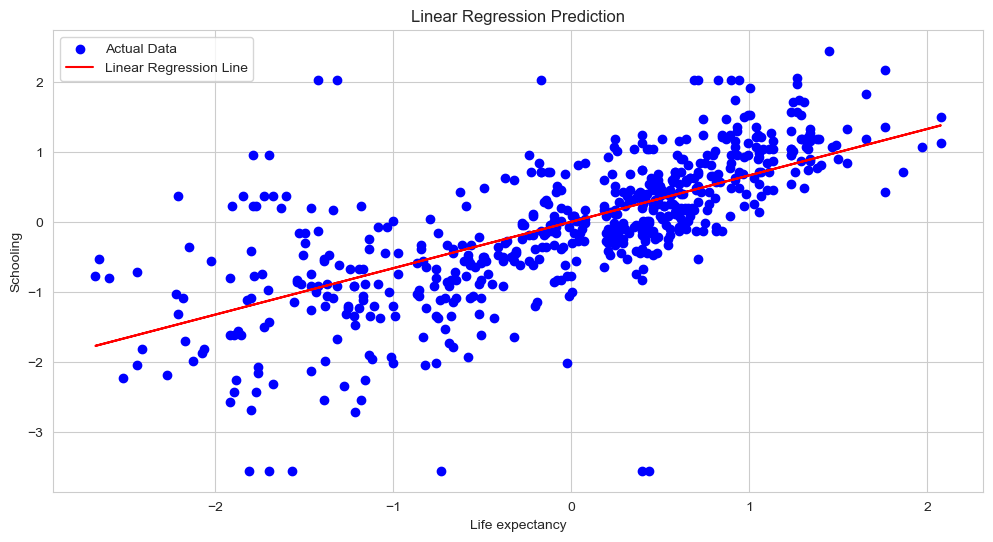

In [40]:
# plot for Linear Regression
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred_linear, color='red', label='Linear Regression Line')
plt.title('Linear Regression Prediction')
plt.xlabel('Life expectancy')
plt.ylabel('Schooling')
plt.legend()
plt.show()

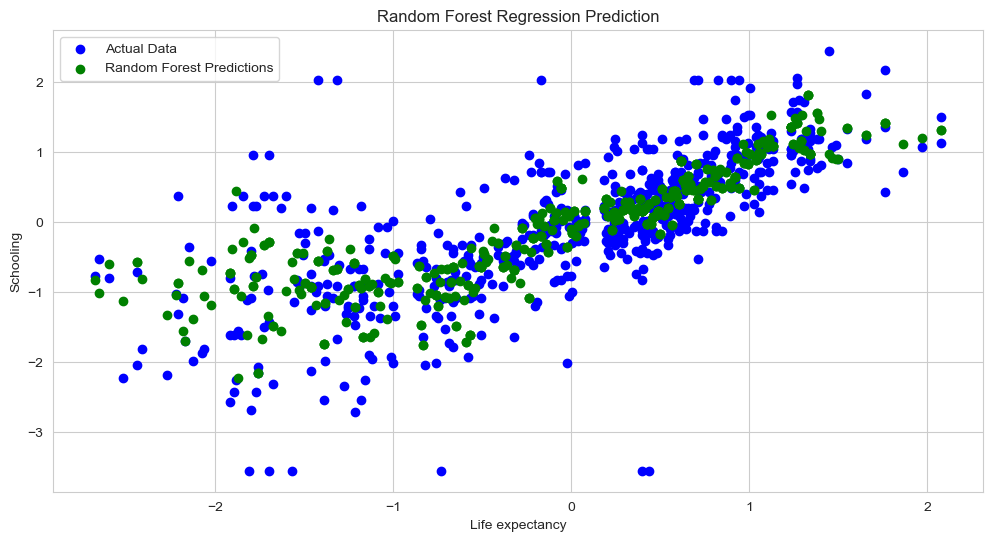

In [41]:
# Plot for Random Forest Regression
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred_rf, color='green', label='Random Forest Predictions')
plt.title('Random Forest Regression Prediction')
plt.xlabel('Life expectancy')
plt.ylabel('Schooling')
plt.legend()
plt.show() 

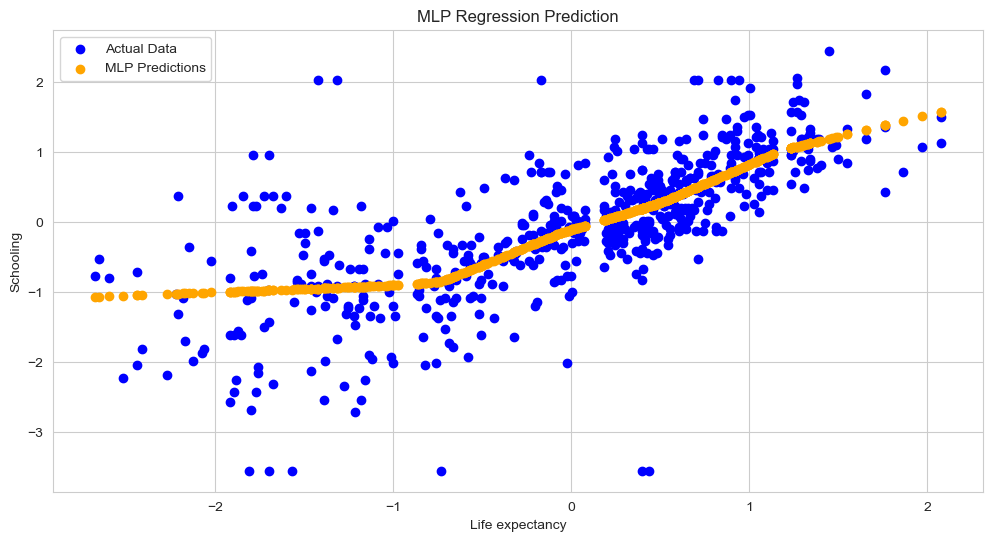

In [42]:
# Plot for MLP Regression
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred_mlp, color='orange', label='MLP Predictions')
plt.title('MLP Regression Prediction')
plt.xlabel('Life expectancy')
plt.ylabel('Schooling')
plt.legend()
plt.show() 

### Task 5

In [53]:
# Preparing data with the original feature and its square
X = df[['Life expectancy ']].copy() 
X['Life expectancy squared'] = X['Life expectancy '] ** 2
y = df['Schooling']

# Separating data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Multi Layer Perceptron model with the original feature
mlp_model_original = MLPRegressor(random_state=42, max_iter=1000)
mlp_model_original.fit(X_train[['Life expectancy ']], y_train)
y_pred_mlp_original = mlp_model_original.predict(X_test[['Life expectancy ']])

# Training a Multi Layer Perceptron model with the original feature and its square
mlp_model_with_square = MLPRegressor(random_state=42, max_iter=1000)
mlp_model_with_square.fit(X_train, y_train)
y_pred_mlp_with_square = mlp_model_with_square.predict(X_test)

# Evaluation of MLP models
mse_mlp_original = mean_squared_error(y_test, y_pred_mlp_original)
r2_mlp_original = r2_score(y_test, y_pred_mlp_original)
mse_mlp_with_square = mean_squared_error(y_test, y_pred_mlp_with_square)
r2_mlp_with_square = r2_score(y_test, y_pred_mlp_with_square)

### Task 6

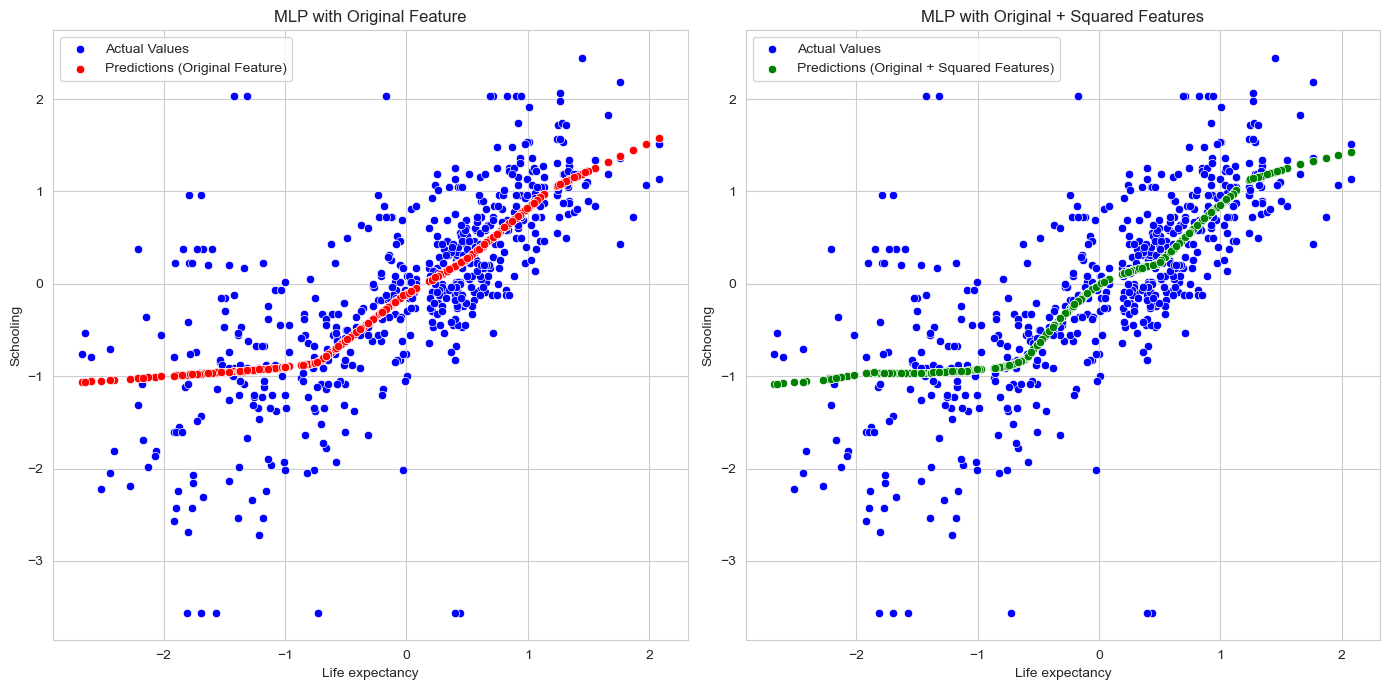

MLP with Original Feature - MSE: 0.46403638165453887 R2: 0.5422556550584305
MLP with Original + Squared Features - MSE: 0.460009817193299 R2: 0.5462276218794446


In [54]:
# Visualisation of results
sns.set_style('whitegrid')
plt.figure(figsize=(14, 7)) 

# Graph for the MLP model with the original feature
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test['Life expectancy '], y=y_test, color='blue', label='Actual Values')
sns.scatterplot(x=X_test['Life expectancy '], y=y_pred_mlp_original, color='red', label='Predictions (Original Feature)')
plt.title('MLP with Original Feature')
plt.xlabel('Life expectancy')
plt.ylabel('Schooling')
plt.legend()

# Graph for the MLP model with both features
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test['Life expectancy '], y=y_test, color='blue', label='Actual Values')
sns.scatterplot(x=X_test['Life expectancy '], y=y_pred_mlp_with_square, color='green', label='Predictions (Original + Squared Features)')
plt.title('MLP with Original + Squared Features')
plt.xlabel('Life expectancy')
plt.ylabel('Schooling')
plt.legend()

plt.tight_layout()
plt.show()

# Output the metrics
print('MLP with Original Feature - MSE:', mse_mlp_original, 'R2:', r2_mlp_original)
print('MLP with Original + Squared Features - MSE:', mse_mlp_with_square, 'R2:', r2_mlp_with_square)

In [45]:
from mpl_toolkits.mplot3d import Axes3D 

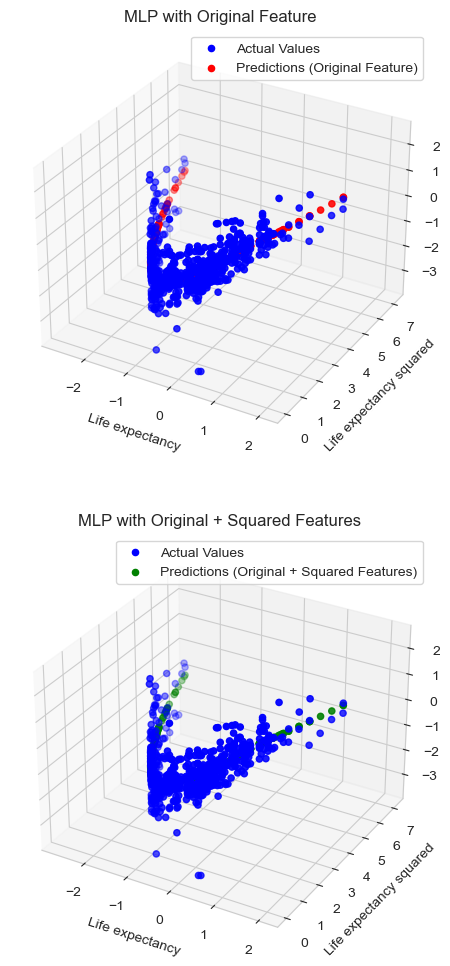

In [56]:
# create 3D graphics
fig = plt.figure(figsize=(14, 12))

# graph for the MLP model with the original feature
ax1 = fig.add_subplot(211, projection='3d')
ax1.scatter(X_test['Life expectancy '], X_test['Life expectancy squared'], y_test, color='blue', label='Actual Values')
ax1.scatter(X_test['Life expectancy '], X_test['Life expectancy squared'], y_pred_mlp_original, color='red', label='Predictions (Original Feature)')
ax1.set_title('MLP with Original Feature')
ax1.set_xlabel('Life expectancy')
ax1.set_ylabel('Life expectancy squared')
ax1.set_zlabel('Schooling')
ax1.legend()

# graph for the MLP model with both features
ax2 = fig.add_subplot(212, projection='3d')
ax2.scatter(X_test['Life expectancy '], X_test['Life expectancy squared'], y_test, color='blue', label='Actual Values')
ax2.scatter(X_test['Life expectancy '], X_test['Life expectancy squared'], y_pred_mlp_with_square, color='green', label='Predictions (Original + Squared Features)')
ax2.set_title('MLP with Original + Squared Features')
ax2.set_xlabel('Life expectancy')
ax2.set_ylabel('Life expectancy squared')
ax2.set_zlabel('Schooling')
ax2.legend()

plt.show()